# Assignment
Take the Restaurant dataset given in google classroom


# Question 1
Prepare the data for modelling, This will include
- Converting to lowercase
- Removing stopwords
- Lemmatization
- Stemming
- Removing numbers 

### Do it all in 1 function

# Question 2
Once the data has been cleaned :-
- Convert the data into vectors with TF-IDF Vectorizer. (No train-test required)


# Question 3
- Fit the K-means Clustering Algorithm on your vectors
-  Try to fit K-means with different number of n_clusters and choose how many to go for with the help of **Elbow Plot**

# Question 4
- Once done, create a Wordcloud for the whole text file 
- As well as 1 wordcloud for each cluster. 


------------

![](https://media.tenor.com/d8fG2J6pkAUAAAAC/friends-chandler.gif)

# A hint
The file is stores as a ```tsv```.

You can load a ```tsv``` file with ```pd.read_csv``` while passing the seperator or ```sep``` argument as ```\t```.

This tells pandas that the file is seperated by tab's instead of comma's

In [3]:
import pandas

In [4]:
data = pandas.read_csv('/Users/meghnarana/Downloads/datasets/Restaurant_Reviews.tsv',sep='\t')

In [5]:
data

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [6]:
import nltk

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.corpus import stopwords

from nltk.stem.snowball import SnowballStemmer
sn_stemmer=SnowballStemmer("english")

In [7]:
def datacleaning(data):

    x = data.lower()
    y = word_tokenize(x)
    temp = []
    for i in y:
        if i.isdigit():
            pass
        else:
            temp.append(i)
    rem = ' '.join(temp)
    
    y1 = word_tokenize(rem)
    temp1  = []
    for i in y1:
        if i in stopwords.words("english"):
            pass
        else:
            temp1.append(i)
    rem1 = ' '.join(temp1)
    
    y2 = word_tokenize(rem1)
    temp2 = []
    for i in y2:
        temp2.append(lemmatizer.lemmatize(i))
        rem2 = ' '.join(temp2)
    
    y3 = word_tokenize(rem2)
    temp3 = []
    for i in y3:
        temp3.append(sn_stemmer.stem(i))
        rem3 = ' '.join(temp3) 
     
    return rem3

In [8]:
data['Cleaned'] = data['Review'].apply(datacleaning)

In [9]:
data

,Review,Liked,Cleaned
0,Wow... Loved this place.,1,wow ... love place .
1,Crust is not good.,0,crust good .
2,Not tasty and the texture was just nasty.,0,tasti textur nasti .
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...
4,The selection on the menu was great and so wer...,1,select menu great price .
...,...,...,...
995,I think food should have flavor and texture an...,0,think food flavor textur lack .
996,Appetite instantly gone.,0,appetit instant gone .
997,Overall I was not impressed and would not go b...,0,overal impress would go back .
998,"The whole experience was underwhelming, and I ...",0,"whole experi underwhelm , think ll go ninja su..."


In [10]:
x = data['Cleaned']

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
vectorizer = TfidfVectorizer()

In [13]:
vectorizer.fit(x)

TfidfVectorizer()

In [14]:
x_vector = vectorizer.transform(x)

In [15]:
x_vector

<1000x1574 sparse matrix of type '<class 'numpy.float64'>'
	with 5441 stored elements in Compressed Sparse Row format>

In [16]:
x_vector.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

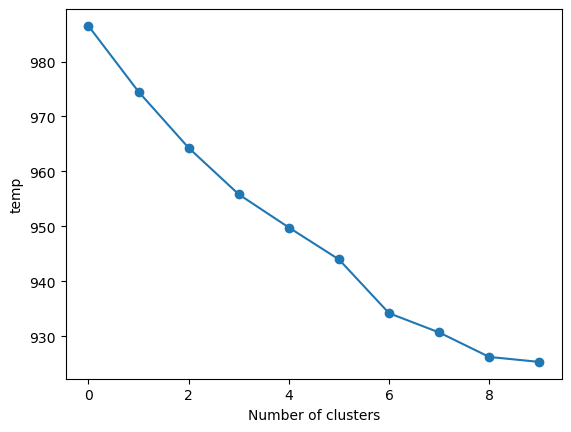

In [18]:
temp = []
for i in range(10):
    cluster = KMeans(n_clusters=i+1)
    cluster_model = cluster.fit(x_vector)
    output = cluster_model.inertia_
    temp.append(output)
    
plt.plot(range(10), temp, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('temp')
plt.show()

In [19]:
cluster = KMeans(n_clusters=8)

In [20]:
cluster_model = cluster.fit(x_vector)

In [21]:
cluster_predict = cluster.predict(x_vector)

In [22]:
cluster_predict

array([5, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 7, 0, 0, 0, 0, 0, 4, 5, 0, 0, 2,
       4, 0, 0, 3, 0, 0, 2, 0, 0, 0, 5, 3, 5, 0, 3, 4, 0, 4, 0, 3, 0, 4,
       0, 0, 2, 3, 0, 0, 0, 0, 3, 2, 0, 2, 0, 0, 0, 0, 0, 5, 0, 7, 5, 4,
       0, 7, 2, 0, 0, 3, 4, 0, 5, 0, 4, 3, 3, 3, 0, 5, 0, 5, 0, 0, 0, 2,
       0, 0, 1, 0, 0, 0, 0, 7, 7, 2, 3, 3, 0, 3, 0, 0, 0, 0, 2, 0, 7, 3,
       3, 2, 0, 0, 3, 0, 0, 0, 0, 5, 2, 4, 4, 0, 5, 0, 5, 4, 0, 0, 5, 0,
       3, 0, 3, 3, 0, 2, 0, 0, 0, 0, 4, 0, 2, 5, 4, 4, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 7, 0, 0, 0, 0, 0, 5, 3, 0, 0, 0, 0, 0, 0, 0, 7,
       4, 0, 7, 0, 0, 0, 0, 6, 5, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 5, 0, 0,
       0, 0, 3, 2, 0, 0, 4, 3, 5, 0, 5, 0, 0, 0, 0, 7, 0, 3, 3, 0, 0, 2,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 5, 5, 2, 0, 0, 5, 0, 0, 0, 7, 4, 0, 0,
       0, 0, 5, 0, 0, 5, 0, 7, 0, 0, 0, 5, 3, 4, 4, 0, 0, 0, 5, 0, 0, 4,
       0, 0, 4, 2, 3, 1, 0, 2, 0, 5, 3, 0, 4, 0, 0, 0, 1, 4, 0, 5, 0, 0,
       0, 0, 5, 5, 0, 0, 2, 1, 0, 0, 0, 0, 5, 3, 3,

In [23]:
data['Clustered'] = cluster_predict

In [24]:
data

,Review,Liked,Cleaned,Clustered
0,Wow... Loved this place.,1,wow ... love place .,5
1,Crust is not good.,0,crust good .,3
2,Not tasty and the texture was just nasty.,0,tasti textur nasti .,0
3,Stopped by during the late May bank holiday of...,1,stop late may bank holiday rick steve recommen...,0
4,The selection on the menu was great and so wer...,1,select menu great price .,0
...,...,...,...,...
995,I think food should have flavor and texture an...,0,think food flavor textur lack .,2
996,Appetite instantly gone.,0,appetit instant gone .,0
997,Overall I was not impressed and would not go b...,0,overal impress would go back .,7
998,"The whole experience was underwhelming, and I ...",0,"whole experi underwhelm , think ll go ninja su...",0


In [25]:
datanew = data.groupby(['Clustered'])

In [26]:
datanew

In [27]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot

In [28]:
text = str(data['Cleaned'].values)

In [29]:
text

'[\'wow ... love place .\' \'crust good .\' \'tasti textur nasti .\'\n \'stop late may bank holiday rick steve recommend love .\'\n \'select menu great price .\' \'get angri want damn pho .\'\n "honeslti n\'t tast fresh . )"\n \'potato like rubber could tell made ahead time kept warmer .\'\n \'fri great .\' \'great touch .\' \'servic prompt .\' \'would go back .\'\n \'cashier care ever say still end wayyy overpr .\'\n \'tri cape cod ravoli , chicken , cranberri ... mmmm !\'\n \'disgust pretti sure human hair .\' \'shock sign indic cash .\'\n \'high recommend .\' \'waitress littl slow servic .\'\n \'place worth time , let alon vega .\' \'like .\' \'burritto blah !\'\n \'food , amaz .\' \'servic also cute .\'\n \'could care le ... interior beauti .\' \'perform .\'\n "\'s right .... red velvet cake ..... ohhh stuff good ."\n \'- never brought salad ask .\'\n \'hole wall great mexican street taco , friend staff .\'\n \'took hour get food tabl restaur food luke warm , sever run around like 

In [30]:
wordcloud = WordCloud(background_color="white").generate(text)

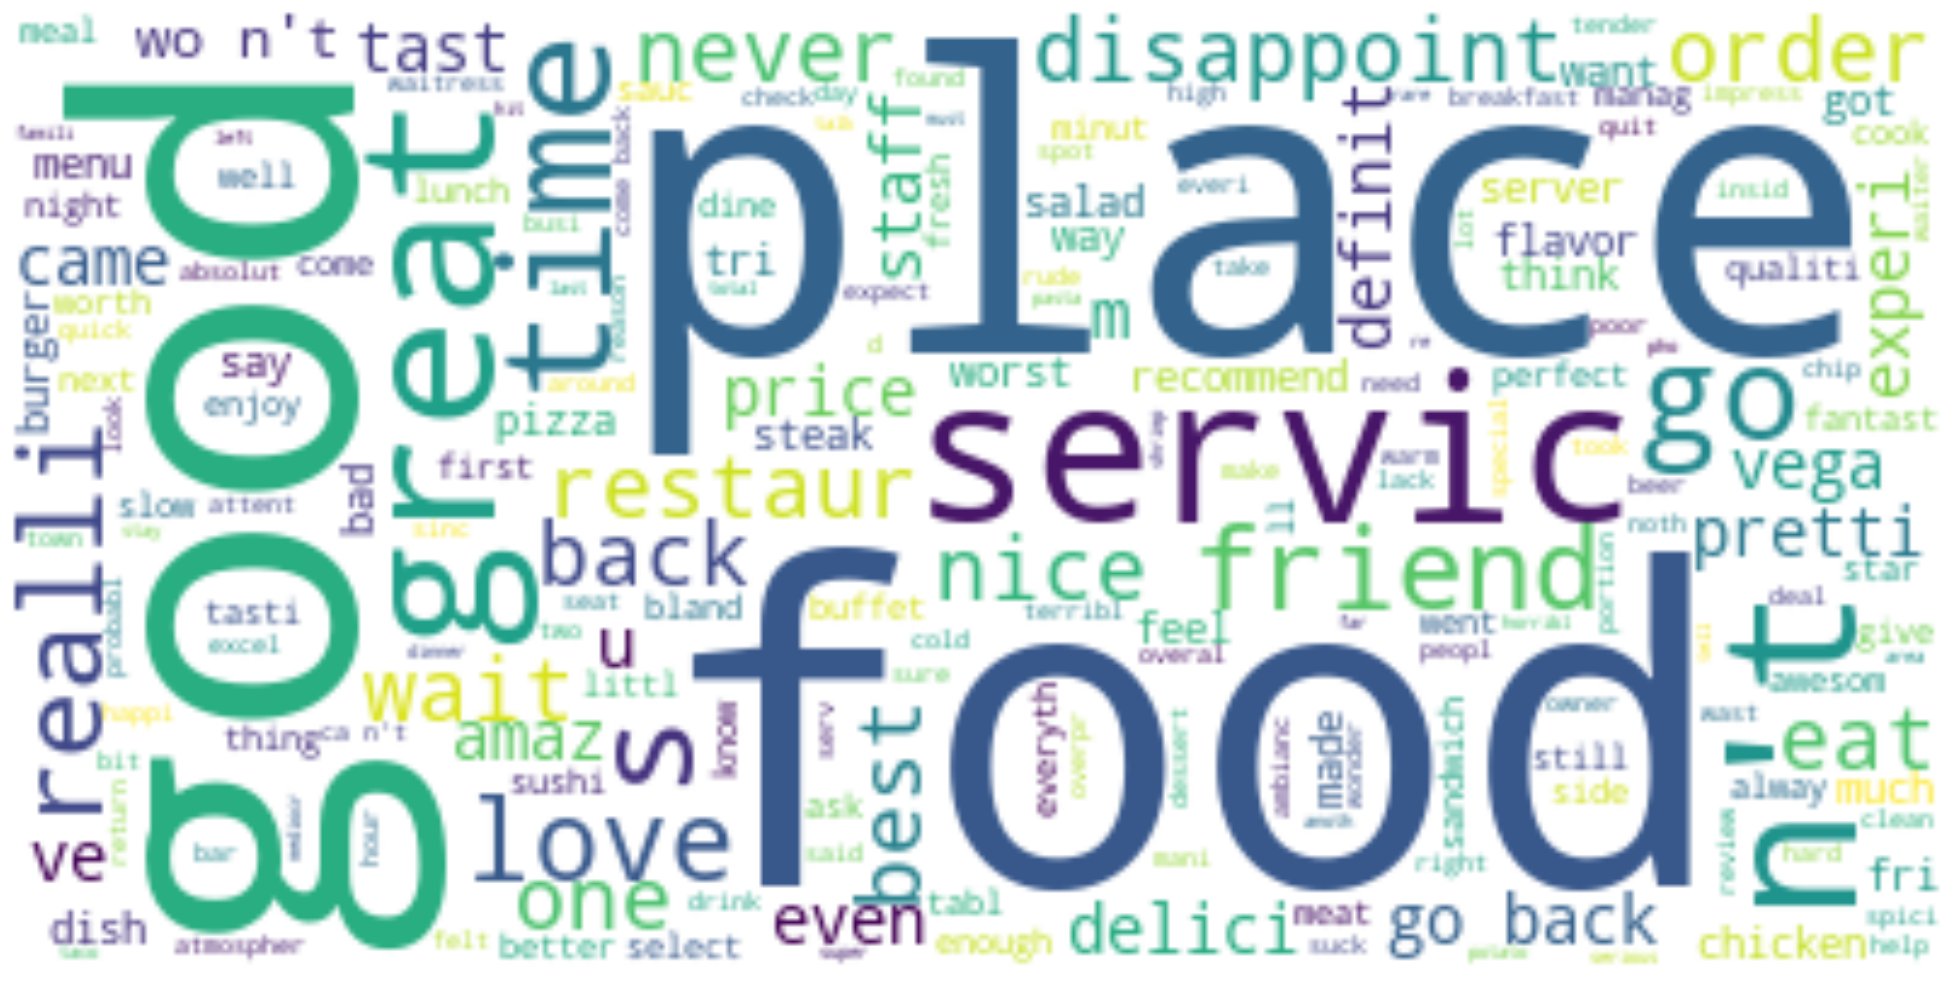

In [31]:
plt.figure(figsize=(25,20))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [32]:
cluster0 = data[(data["Clustered"] == 0)]
cluster1 = data[(data["Clustered"] == 1)]
cluster2 = data[(data["Clustered"] == 2)]
cluster3 = data[(data["Clustered"] == 3)]
cluster4 = data[(data["Clustered"] == 4)]
cluster5 = data[(data["Clustered"] == 5)]
cluster6 = data[(data["Clustered"] == 6)]
cluster7 = data[(data["Clustered"] == 7)]

In [34]:
textarray0 = str(cluster0['Cleaned'].values)
textarray1 = str(cluster1['Cleaned'].values)
textarray2 = str(cluster2['Cleaned'].values) 
textarray3 = str(cluster3['Cleaned'].values) 
textarray4 = str(cluster4['Cleaned'].values)
textarray5 = str(cluster5['Cleaned'].values) 
textarray6 = str(cluster6['Cleaned'].values) 
textarray7 = str(cluster7['Cleaned'].values) 

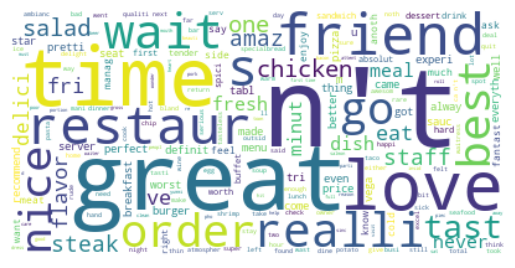

In [35]:
wordcloud0 = WordCloud(background_color = "white").generate(textarray0)

plt.imshow(wordcloud0, interpolation='bilinear')
plt.axis("off")
plt.show()

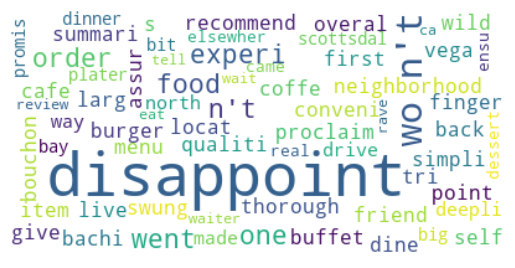

In [36]:
wordcloud1 = WordCloud(background_color = "white").generate(textarray1)

plt.imshow(wordcloud1, interpolation='bilinear')
plt.axis("off")
plt.show()

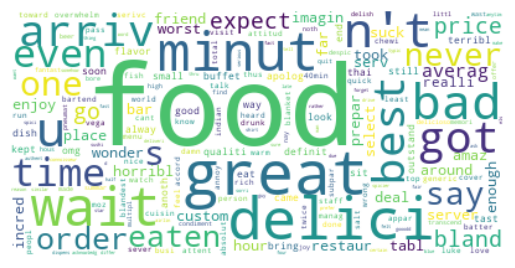

In [37]:
wordcloud2 = WordCloud(background_color = "white").generate(textarray2)

plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis("off")
plt.show()

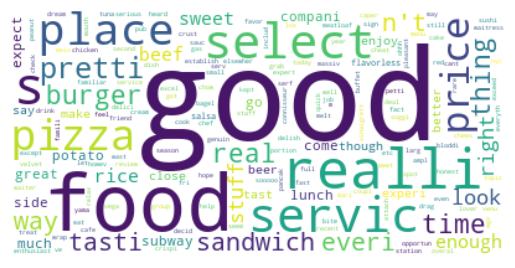

In [38]:
wordcloud3 = WordCloud(background_color = "white").generate(textarray3)

plt.imshow(wordcloud3, interpolation='bilinear')
plt.axis("off")
plt.show()

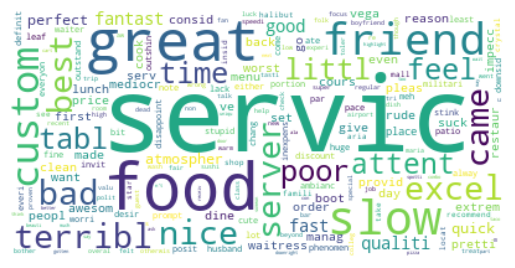

In [39]:
wordcloud4 = WordCloud(background_color = "white").generate(textarray4)

plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

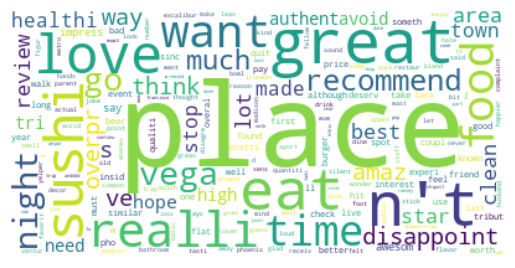

In [40]:
wordcloud5 = WordCloud(background_color = "white").generate(textarray5)

plt.imshow(wordcloud5, interpolation='bilinear')
plt.axis("off")
plt.show()

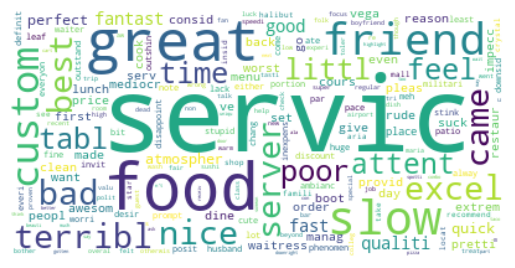

In [41]:
wordcloud6 = WordCloud(background_color = "white").generate(textarray6)

plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()

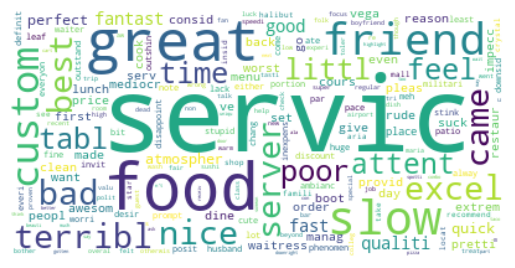

In [42]:
wordcloud7 = WordCloud(background_color = "white").generate(textarray7)

plt.imshow(wordcloud4, interpolation='bilinear')
plt.axis("off")
plt.show()